In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle

In [9]:
train_x = np.linspace(0, 5, 100)
train_y = train_x + np.random.random(100)*2-1

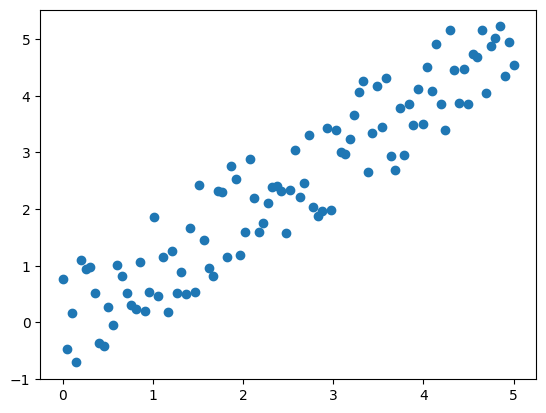

In [10]:
plt.scatter(train_x, train_y)
plt.show()

In [11]:
train_x = train_x.reshape(-1,1)
train_y = train_y.reshape(-1,1)
reg = LinearRegression().fit(train_x, train_y)
reg.score(train_x, train_y)

0.8730097512141526

In [12]:
filename = 'model.sav'
pickle.dump(reg, open(filename, 'wb'))

In [13]:
%%writefile test.py
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression

# Загрузка обученной модели
filename = 'model.sav'
model = pickle.load(open(filename, 'rb'))

# Первый тестовый набор данных
def test_one():
  test_x_1 = np.linspace(0, 15, 100)
  test_y_1 = test_x_1 + np.random.random(100)*3-2
  test_x_1 = test_x_1.reshape(-1,1)
  test_y_1 = test_y_1.reshape(-1,1)
  assert model.score(test_x_1, test_y_1) > 0.5, "Низкий уровень предсказания!"

# Второй тестовый набор данных
def test_two():
  test_x_2 = np.linspace(0, 10, 100)
  test_y_2 = test_x_2 + np.random.random(100)*4-3
  test_x_2 = test_x_2.reshape(-1,1)
  test_y_2 = test_y_2.reshape(-1,1)
  assert model.score(test_x_2, test_y_2) > 0.5, "Низкий уровень предсказания!"

# Шумовой набор данных
def test_with_noise():
  noise_data_x = np.linspace(0, 15, 100)
  noise_data_y = noise_data_x + np.random.random(100)*3-1
  noise_data_y[25:45] *= -2
  noise_data_x = noise_data_x.reshape(-1,1)
  noise_data_y = noise_data_y.reshape(-1,1)
  assert model.score(noise_data_x, noise_data_y) > 0.5, "Низкий уровень предсказания!"

Overwriting test.py


In [14]:
!pytest test.py

============================= test session starts ==============================
platform linux -- Python 3.12.1, pytest-7.3.2, pluggy-1.3.0
rootdir: /home/iir/pets/urfu_projects/mlops_practice/lab5
plugins: hydra-core-1.3.2
collected 3 items                                                              

test.py ..F                                                              [100%]

=================================== FAILURES ===================================
_______________________________ test_with_noise ________________________________

    def test_with_noise():
      noise_data_x = np.linspace(0, 15, 100)
      noise_data_y = noise_data_x + np.random.random(100)*3-1
      noise_data_y[25:45] *= -2
      noise_data_x = noise_data_x.reshape(-1,1)
      noise_data_y = noise_data_y.reshape(-1,1)
>     assert model.score(noise_data_x, noise_data_y) > 0.5, "Низкий уровень предсказания!"
E     AssertionError: Низкий уровень предсказания!
E     assert 0.30570424880616853 > 0.5
E      